# Stock Market Analysis and Prediction- Canadian Banks' Stocks

#### The Data for the Stock Market have been obtained from Yahoo Finance.

### Introduction

In this project, Stock Market Analysis and Prediction will be performed for Four Canadian Banks using data provided by Yahoo Finance. Pandas is used to get stock information, visualize different aspects of it, and finally perform risk analysis on the basis of its performance history. Also using the Monte Carlo method the future stock prices are pridicted.

In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# For division
from __future__ import division

# For reading stock data from yahoo finance
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

### Section 1 - Basic Analysis of Stock market

Here the stock information will be obtained using pandas from Yahoo Finance for four Canadian Banks including The Toronto-Dominion Bank (TD), Royal Bank of Canada (RY), Bank of Montreal (BMO) and the Bank of Nova Scotia (BNS) and some analysis will be performed.

In [3]:
# List of Canadian Banks for analytics of their stocks

bank_list = ['TD', 'RY', 'BMO', 'BNS']

# setting up Start and End time for data retrieving
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

#For-loop for retrieving Yahoo finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in bank_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [4]:
#Showing the head of the TD stock data
TD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-07,56.299999,55.830002,56.299999,56.060001,872700.0,53.368195
2019-05-08,56.040001,55.680000,56.040001,55.680000,695100.0,53.006443
2019-05-09,55.630001,54.950001,55.450001,55.470001,1323500.0,52.806526
2019-05-10,55.599998,54.790001,55.459999,55.380001,1342600.0,52.720844
2019-05-13,54.869999,54.480000,54.700001,54.730000,1282300.0,52.102055


In [5]:
#stats for TD stock data
TD.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,54.182609,53.362846,53.781858,53.779960,1.527941e+06,52.264202
std,5.902431,6.471190,6.177230,6.194801,1.067473e+06,5.656680
min,36.799999,33.740002,36.029999,33.830002,4.323000e+05,33.382996
25%,54.869999,54.430000,54.630001,54.650002,8.712000e+05,52.330532
50%,56.470001,55.869999,56.209999,56.240002,1.105900e+06,54.529831
75%,57.470001,56.930000,57.220001,57.320000,1.986800e+06,55.773186
max,59.549999,59.200001,59.480000,59.410000,7.550800e+06,56.965736


In [6]:
# General Info for TD stock data
TD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-05-07 to 2020-05-06
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


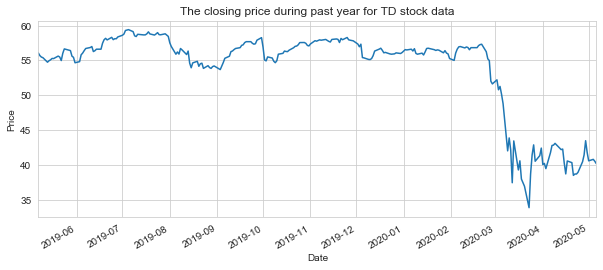

In [96]:
# Plotting the closing price during past year for TD stock data
plt.plot()
TD['Close'].plot(figsize=(10,4))
plt.ylabel('Price')
plt.title('The closing price during past year for TD stock data')
plt.savefig('1.png')

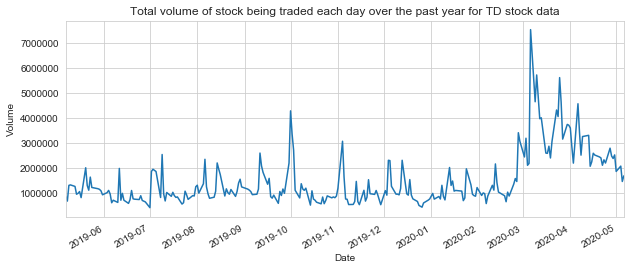

In [95]:
#Plotting the total volume of stock being traded each day over the past year for TD stock data 
plt.plot()
TD['Volume'].plot(figsize=(10,4))
plt.title('Total volume of stock being traded each day over the past year for TD stock data')
plt.ylabel('Volume')
plt.savefig('2.png')

In [11]:
# plotting moving averages for different number of days
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    TD[column_name] = TD['Close'].rolling(ma).mean()

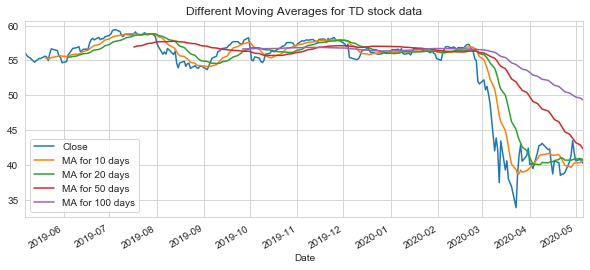

In [97]:
#Plotting different Moving Averages for TD stock data
TD[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))
plt.title('Different Moving Averages for TD stock data')
plt.savefig('3.png')

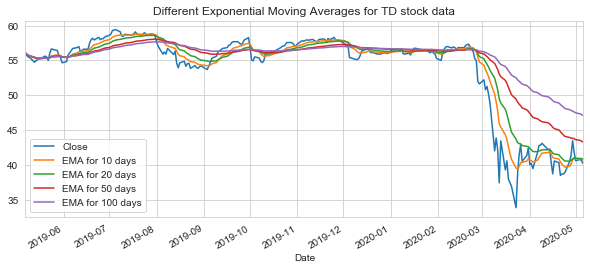

In [99]:
#Plotting different Exponential Moving Averages for TD stock data

EMA_day = [10,20,50,100]

for ema in EMA_day:
    column_name = 'EMA for %s days' %(str(ema))
    TD[column_name] = pd.DataFrame.ewm(TD['Close'], span=ema).mean()


TD[['Close','EMA for 10 days','EMA for 20 days','EMA for 50 days','EMA for 100 days']].plot(subplots=False,figsize=(10,4))

plt.title('Different Exponential Moving Averages for TD stock data')
plt.savefig('4.png')

Exponential Moving Averages react faster to changes. However here we can see that there is little difference between moving averages and exponential moving averages.

### Section 2 - Daily Return Analysis and calculation

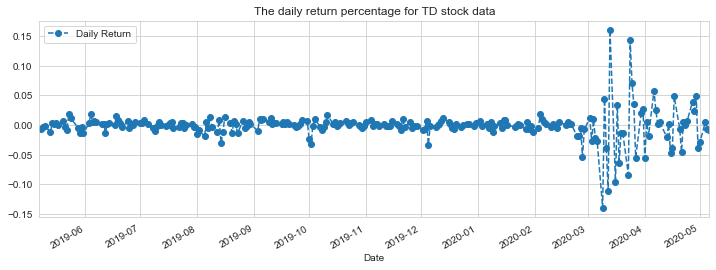

In [100]:
#pct_change is used to find the percent change for each day
TD['Daily Return'] = TD['Close'].pct_change()

# Lets plot the daily return percentage
TD['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')
plt.title('The daily return percentage for TD stock data')
plt.savefig('5.png')

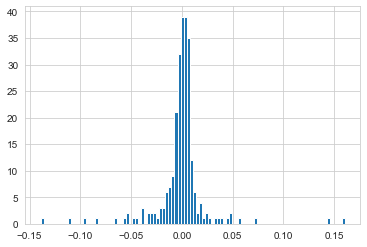

In [15]:
# Plotting average daily return only with histogram
TD['Daily Return'].hist(bins=100)
plt.savefig('5.png')

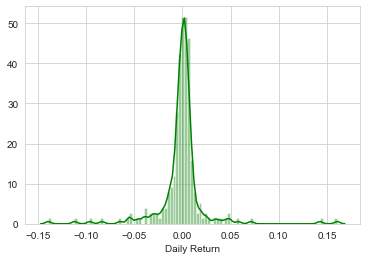

In [16]:
# using of dropna() here because the NaN values can't be read by seaborn
sns.distplot(TD['Daily Return'].dropna(), bins=100, color='green')
plt.savefig('6.png')

In [17]:
# Grab all the closing prices for the bank stock list into one DataFrame
closingprice_df = DataReader(bank_list, 'yahoo', start, end)['Close']

In [18]:
#Showing the head of the closingprice_df
closingprice_df.head(10)

Symbols,BMO,BNS,RY,TD
Date,,,,
2019-05-07,78.360001,54.099998,78.900002,56.060001
2019-05-08,78.199997,53.730000,78.599998,55.680000
2019-05-09,77.660004,53.570000,78.750000,55.470001
2019-05-10,77.650002,53.950001,78.589996,55.380001
2019-05-13,76.309998,52.770000,77.489998,54.730000
2019-05-14,76.730003,52.990002,77.739998,54.939999
2019-05-15,77.080002,52.919998,77.949997,55.070000
2019-05-16,77.220001,53.119999,78.239998,55.270000
2019-05-17,76.800003,53.080002,78.059998,55.250000


In [19]:
# make a new bank returns DataFrame
bank_returns = closingprice_df.pct_change()

In [20]:
#Showing the head of the bank_returns
bank_returns.head()

Symbols,BMO,BNS,RY,TD
Date,,,,
2019-05-07,NaN,NaN,NaN,NaN
2019-05-08,-0.002042,-0.006839,-0.003802,-0.006778
2019-05-09,-0.006905,-0.002978,0.001908,-0.003772
2019-05-10,-0.000129,0.007094,-0.002032,-0.001623
2019-05-13,-0.017257,-0.021872,-0.013997,-0.011737


#### Checking correlations

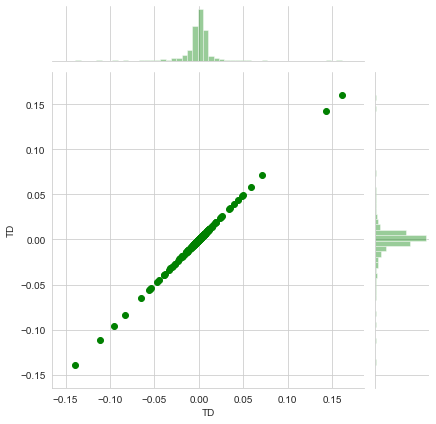

In [22]:
# Comparing TD to itself should show a perfectly linear relationship
sns.jointplot('TD','TD',bank_returns, kind='scatter',color='green')
plt.savefig('7.png')

If two stocks are perfectly correlated with each other a linear relationship bewteen their daily return values should be observed.

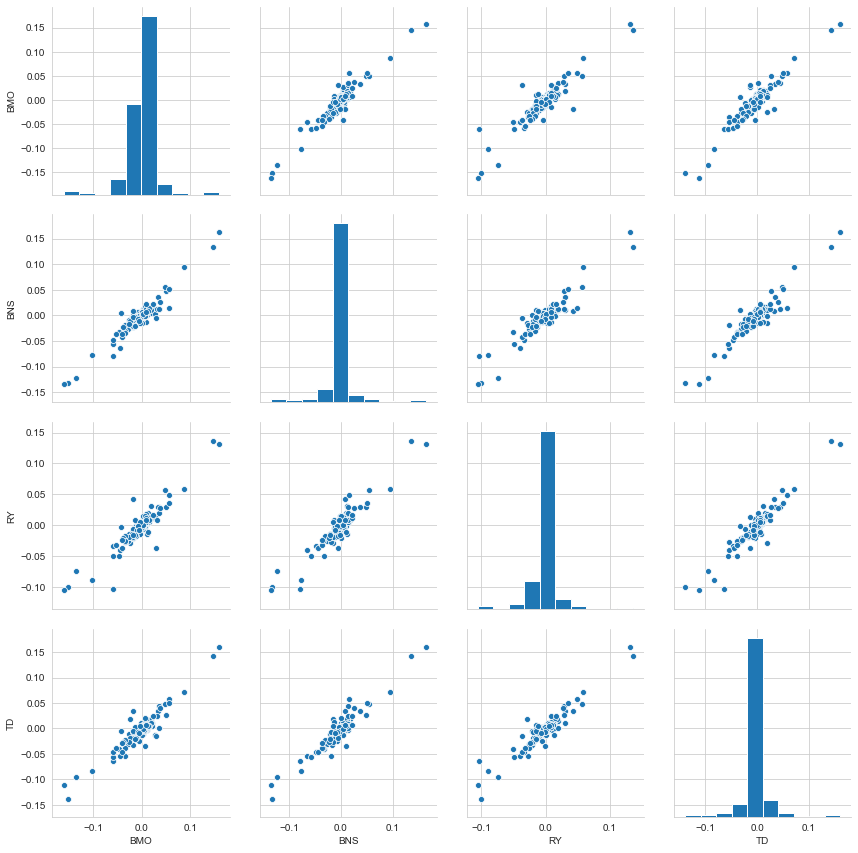

In [23]:
#calling pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(bank_returns.dropna(), height=3)
plt.savefig('8.png')

It can be seen that among the daily return of all bank stocks there is a relatively linear correlation.

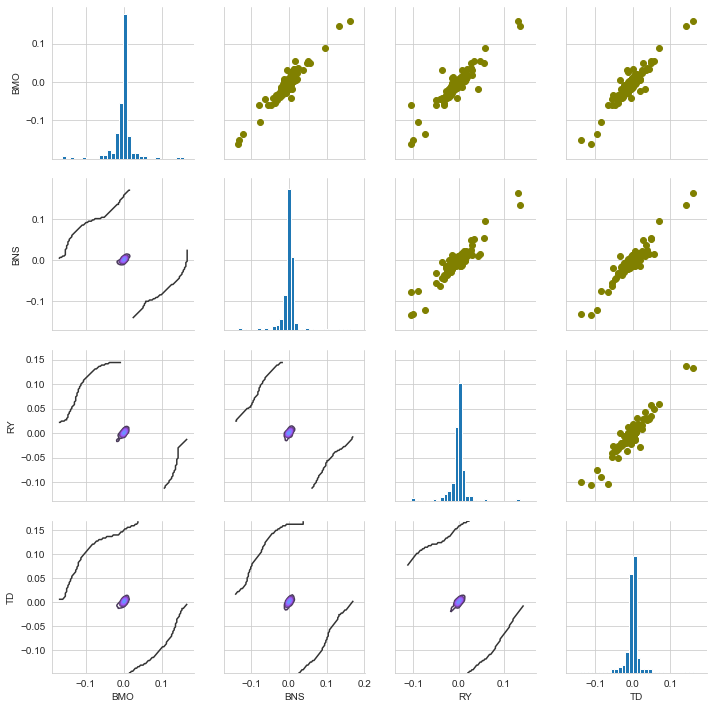

In [24]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(bank_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color='olive')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)
plt.savefig('9.png')

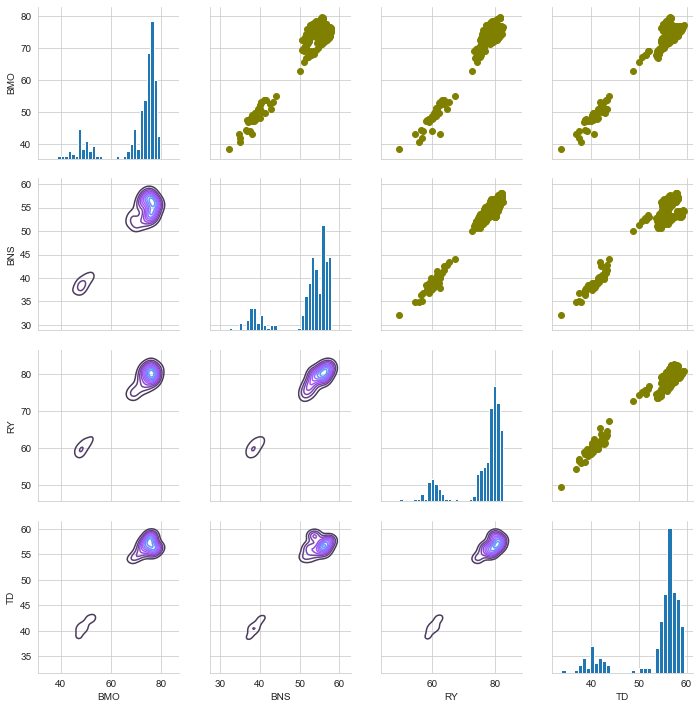

In [25]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='olive')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)
plt.savefig('10.png')

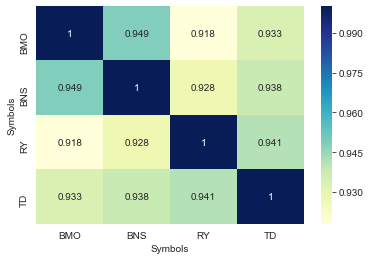

In [26]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(bank_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')
plt.savefig('11.png')

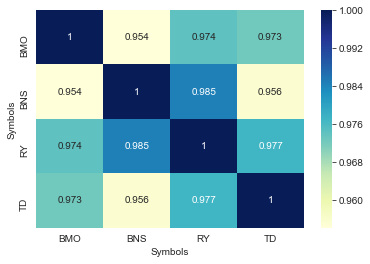

In [27]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')
plt.savefig('12.png')

In our PairPlot although all banks stocks are highly correlated, the BMO (Bank of Montreal) and BNS (Bank of Nova Scotia) numerically and visually have the strongest correlation of daily stock return.

#### Risk Analysis

In [28]:
# Let's start by defining a new DataFrame as a cleaned version of the oriignal bank_returns DataFrame
cbank = bank_returns.dropna()

In [29]:
#Showing the head of the cbank dataframe
cbank.head()

Symbols,BMO,BNS,RY,TD
Date,,,,
2019-05-08,-0.002042,-0.006839,-0.003802,-0.006778
2019-05-09,-0.006905,-0.002978,0.001908,-0.003772
2019-05-10,-0.000129,0.007094,-0.002032,-0.001623
2019-05-13,-0.017257,-0.021872,-0.013997,-0.011737
2019-05-14,0.005504,0.004169,0.003226,0.003837


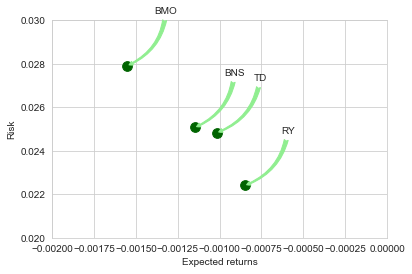

In [30]:
# Defining the area for the circles of scatter plot
area = np.pi*30

plt.scatter(cbank.mean(),cbank.std(),s=area, color='darkgreen')

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.002,0.0000])
plt.ylim([0.02,0.03])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(cbank.columns, cbank.mean(), cbank.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3', color='lightgreen'))
plt.savefig('13.png')

By looking at the scatter plot we can say all of these stocks have similar and slightly negative expected return. The risk is also pretty close.

#### Value at Risk

#### Value at risk using the "bootstrap" method

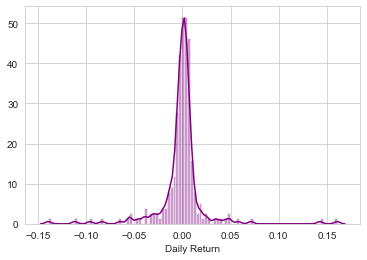

In [32]:
# We should use use dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(TD['Daily Return'].dropna(),bins=100,color='purple')
plt.savefig('14.png')

In [33]:
# The 0.05 empirical quantile of daily returns

# For TD stocks
cbank["TD"].quantile(0.05)

-0.03582218397892943

The 0.05 empirical quantile of daily returns is at -0.027. That means that with 95% confidence, our worst daily loss will not exceed 2.7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.027 * 1,000,000 = $27,000.

In [34]:
# For RBC stocks
cbank["RY"].quantile(0.05)

-0.027591969447397696

The 0.05 empirical quantile of daily returns is at -0.023. That means that with 95% confidence, our worst daily loss will not exceed 2.7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.027 * 1,000,000 = $27,000.

In [37]:
# For the Bank of Nova Scotia stocks
cbank["BNS"].quantile(0.05)

-0.031102690028148302

The 0.05 empirical quantile of daily returns is at -0.031. That means that with 95% confidence, our worst daily loss will not exceed 3.1%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.031 * 1,000,000 = $31,000.

In [38]:
# For BMO stocks
cbank["BMO"].quantile(0.05)

-0.04049208925749399

The 0.05 empirical quantile of daily returns is at -0.040. That means that with 95% confidence, our worst daily loss will not exceed 4.0%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.040 * 1,000,000 = $40,000.

#### Value at Risk using the Monte Carlo method

In [39]:
cbank.head()

Symbols,BMO,BNS,RY,TD
Date,,,,
2019-05-08,-0.002042,-0.006839,-0.003802,-0.006778
2019-05-09,-0.006905,-0.002978,0.001908,-0.003772
2019-05-10,-0.000129,0.007094,-0.002032,-0.001623
2019-05-13,-0.017257,-0.021872,-0.013997,-0.011737
2019-05-14,0.005504,0.004169,0.003226,0.003837


In [40]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for TD
mu = cbank.mean()['TD']

# Now let's grab the volatility of the stock from the std() of the average return for TD
sigma = cbank.std()['TD']

In [41]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [42]:
# For TD Stock
TD.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,EMA for 10 days,EMA for 20 days,EMA for 50 days,EMA for 100 days,Daily Return
Date,,,,,,,,,,,,,,,
2019-05-07,56.299999,55.830002,56.299999,56.060001,872700.0,53.368195,NaN,NaN,NaN,NaN,56.060001,56.060001,56.060001,56.060001,NaN
2019-05-08,56.040001,55.680000,56.040001,55.680000,695100.0,53.006443,NaN,NaN,NaN,NaN,55.851001,55.860501,55.866201,55.868101,-0.006778
2019-05-09,55.630001,54.950001,55.450001,55.470001,1323500.0,52.806526,NaN,NaN,NaN,NaN,55.697841,55.717112,55.728817,55.732738,-0.003772
2019-05-10,55.599998,54.790001,55.459999,55.380001,1342600.0,52.720844,NaN,NaN,NaN,NaN,55.593127,55.619793,55.636313,55.641891,-0.001623
2019-05-13,54.869999,54.480000,54.700001,54.730000,1282300.0,52.102055,NaN,NaN,NaN,NaN,55.345347,55.404560,55.440265,55.452145,-0.011737


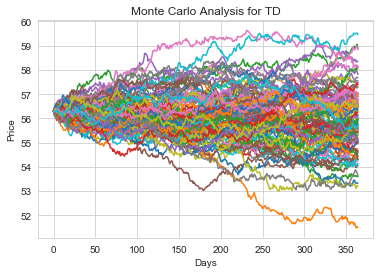

In [57]:
td_start_price = 56.299999


for run in range(100):
    plt.plot(stock_monte_carlo(td_start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for TD')
plt.savefig('15.png')

In [58]:
# For ACB Stock
RY.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-07,79.070000,78.550003,78.970001,78.900002,641300.0,75.630119
2019-05-08,79.000000,78.459999,78.879997,78.599998,401300.0,75.342545
2019-05-09,78.870003,77.980003,78.250000,78.750000,907800.0,75.486336
2019-05-10,78.860001,77.760002,78.639999,78.589996,704100.0,75.332962
2019-05-13,77.750000,77.160004,77.580002,77.489998,1994800.0,74.278542


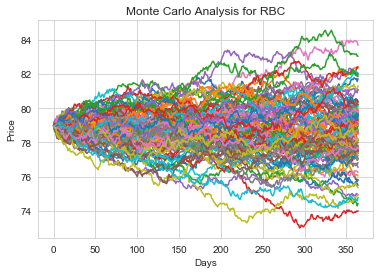

In [59]:
ry_start_price = 78.970001


for run in range(100):
    plt.plot(stock_monte_carlo(ry_start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for RBC')
plt.savefig('16.png')

In [60]:
# For tthe Bank of Nova Scotia Stock
BNS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-07,54.169998,53.830002,54.049999,54.099998,500200.0,51.304695
2019-05-08,54.130001,53.730000,54.080002,53.730000,435700.0,50.953812
2019-05-09,53.700001,53.259998,53.490002,53.570000,562900.0,50.802086
2019-05-10,54.040001,53.139999,53.689999,53.950001,565800.0,51.162449
2019-05-13,53.480000,52.570000,53.480000,52.770000,611300.0,50.043415


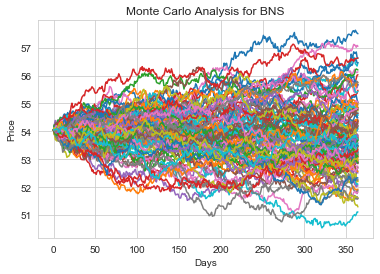

In [61]:
bns_start_price = 54.049999

for run in range(100):
    plt.plot(stock_monte_carlo(bns_start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for BNS')
plt.savefig('17.png')

In [62]:
# For BMO Stock
BMO.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-07,78.599998,78.059998,78.279999,78.360001,420600.0,74.381325
2019-05-08,78.519997,78.050003,78.239998,78.199997,293500.0,74.229446
2019-05-09,77.910004,77.190002,77.500000,77.660004,443500.0,73.716881
2019-05-10,77.900002,76.790001,77.610001,77.650002,305000.0,73.707382
2019-05-13,76.910004,76.040001,76.820000,76.309998,426100.0,72.435417


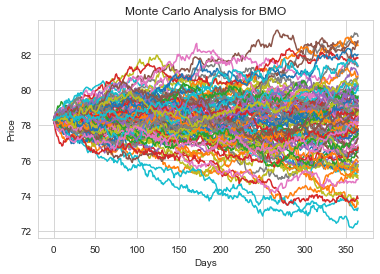

In [63]:
bmo_start_price = 78.279999

for run in range(100):
    plt.plot(stock_monte_carlo(bmo_start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for BMO')
plt.savefig('18.png')

Getting a histogram of the end results for a much larger run

In [64]:
# Lets start with TD stock price


# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(td_start_price,days,mu,sigma)[days-1]

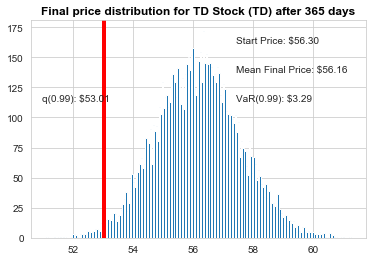

In [65]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % td_start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (td_start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for TD Stock (TD) after %s days" % days, weight='bold', color='black')
plt.savefig('19.png')

Value at Risk for the TD, which looks to be $3.29 for every investment of 56.30 (The price of one initial TD Stock).

In [74]:
# Lets check RBC stock price


# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(ry_start_price,days,mu,sigma)[days-1]

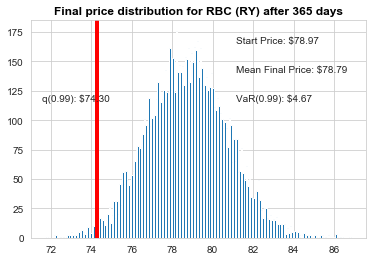

In [75]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % ry_start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (ry_start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for RBC (RY) after %s days" % days, weight='bold', color='black')
plt.savefig('20.png')

Value at Risk for the RCB, which looks to be $ 4.67 for every investment of 78.97 (The price of one initial RY Stock).

In [76]:
# Lets Check the Bank of Nova Scotia stock price


# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(bns_start_price,days,mu,sigma)[days-1]

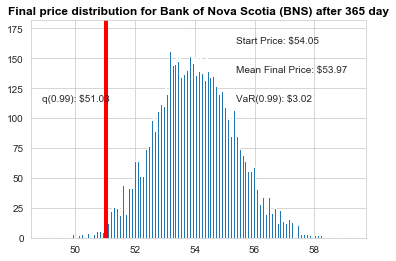

In [77]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % bns_start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (bns_start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Bank of Nova Scotia (BNS) after %s day" % days, weight='bold', color='black')
plt.savefig('21.png')

Value at Risk for the the Bank of Nova Scotia (BNS), which looks to be $ .02 for every investment of 54.05 (The price of one initial BNS Stock).

In [78]:
# Lets start with BMO stock price


# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(bmo_start_price,days,mu,sigma)[days-1]

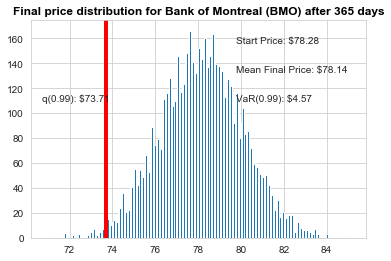

In [79]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % bmo_start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (bmo_start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Bank of Montreal (BMO) after %s days" % days, weight='bold', color='black')
plt.savefig('22.png')

Value at Risk for the the Bank of Nova Scotia (BNS), which looks to be $ 4.57 for every investment of 78.28 (The price of one initial BMO Stock).